<center>
<img src="https://benefits.fastfive.co.kr/wp-content/uploads/2017/12/logo_%ED%8C%A8%EC%8A%A4%ED%8A%B8%EC%BA%A0%ED%8D%BC%EC%8A%A4-600x500.png" width="300" height="300"><br>
</center>

파이썬을 활용한 이커머스 데이터분석_강의를 듣고 따라했던 코딩과 요점을 정리하였다.
 - 출처: [fast campus](https://fastcampus.co.kr/?gclid=CjwKCAjwqvyFBhB7EiwAER786a4FhRzvL9JiiOOTS5TL22ZuXVUKWvF6wWni06h-6fIZ5tp1j0J5phoCoHMQAvD_BwE)




# Chapter.08 쇼핑몰 매출 예측 (Times Series)

## 분석의 목적


- 시간 관련 데이터 다양하게 조작하기

- fbprophet을 통한 시계열 예측

- AutoRegressive 알고리즘을 통한 예측



## 1. 시간 관련 데이터 다양하게 조작하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime, timedelta

In [3]:
today =datetime.now()

In [4]:
today

datetime.datetime(2021, 7, 8, 8, 49, 6, 223234)

In [5]:
today.day

8

In [6]:
today.year

2021

In [7]:
today.month

7

In [8]:
today

datetime.datetime(2021, 7, 8, 8, 49, 6, 223234)

timedelta 의 파라미터값을 조정 할 수 있다. 년, 월, 일, 시간 ..

In [9]:
today + timedelta(days = 10)

datetime.datetime(2021, 7, 18, 8, 49, 6, 223234)

간단하게 DataFrame 을 만들어 보자. (의미는 없는 값)

In [10]:
data = pd.DataFrame({'date':['7/6/2021', '7/7/2021', '7/8/2021'], 'value':[10,20,30]})

In [11]:
data

,date,value
0,7/6/2021,10
1,7/7/2021,20
2,7/8/2021,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


Dtype을 보면 date가 object로 되어있다. string(문자열)로 인식 하고 있기 때문에 작업하는데에 에로사항이 많기에 바꾸어 주도록 하자.

- pd.to_datetime() 함수를 사용한다.

In [13]:
pd.to_datetime(data['date'])

0   2021-07-06
1   2021-07-07
2   2021-07-08
Name: date, dtype: datetime64[ns]

dtype 가 object에서 datetime64로 변경 되었다.

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [16]:
data['date'].loc[0]

Timestamp('2021-07-06 00:00:00')

In [17]:
data['date'].loc[0].month

7

In [18]:
data = pd.DataFrame({'date':['7-6-2021 1:11:11', '7-7-2021 2:11:11', '7-8-2021 3:11:11'], 'value':[10,20,30]})

In [19]:
data

,date,value
0,7-6-2021 1:11:11,10
1,7-7-2021 2:11:11,20
2,7-8-2021 3:11:11,30


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [21]:
pd.to_datetime(data['date'])

0   2021-07-06 01:11:11
1   2021-07-07 02:11:11
2   2021-07-08 03:11:11
Name: date, dtype: datetime64[ns]

위와 했던 방법과 동일하게 바꾸어 주었다. dtype 변경 그리고 년-월-일 순으로 똑똑하게 알아서 바꿔준다는것을 눈으로 확인 해 볼 수 있다.

In [22]:
data['date'] = pd.to_datetime(data['date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [24]:
data['date'].loc[0]

Timestamp('2021-07-06 01:11:11')

In [25]:
data['date'].loc[0].day

6

In [26]:
data['date'].loc[0].second

11

In [27]:
data = pd.DataFrame({'date': ['21-7-8', '21-7-9', '21-7-10'], 'value': [10,20,30] })

In [28]:
data

,date,value
0,21-7-8,10
1,21-7-9,20
2,21-7-10,30


In [29]:
pd.to_datetime(data['date'])

0   2008-07-21
1   2009-07-21
2   2010-07-21
Name: date, dtype: datetime64[ns]

미국식 날짜표현법 으로 나타났다. format 파라미터를 추가하여 이것을 재수정 해보자.

In [30]:
pd.to_datetime(data['date'], format = '%y-%m-%d')

0   2021-07-08
1   2021-07-09
2   2021-07-10
Name: date, dtype: datetime64[ns]

이렇게 우리가 원하는 형식으로 날짜표현법을 바꿀 수 있다.

마지막으로 datetime 컬럼에 관하여 알아볼 것이 있다. 엑셀 파일을 불러와 보자. 

In [31]:
data = pd.read_excel('./data/Superstore.xls')

In [32]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


data가 깔끔한 컬럼만 인덱싱해 보자.

In [33]:
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]

In [34]:
data

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164
...,...,...,...,...
9989,2014-01-21,2014-01-23,25.2480,4.1028
9990,2017-02-26,2017-03-03,91.9600,15.6332
9991,2017-02-26,2017-03-03,258.5760,19.3932
9992,2017-02-26,2017-03-03,29.6000,13.3200


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
 2   Sales       9994 non-null   float64       
 3   Profit      9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 312.4 KB


여기서 확인해야 할 부분은 Date 컬럼의 Dtype가 datetime으로 나오는지. string으로 불러오질 경우는 pd.to_datetime() 함수를 사용한다.

같은 datetime은 '-' 이 될까?  Order Date 와 Ship Date 를 빼보자. (주문 날짜와 배송 날짜)

In [36]:
data['gap'] = data['Ship Date'] - data['Order Date']

In [37]:
data

,Order Date,Ship Date,Sales,Profit,gap
0,2016-11-08,2016-11-11,261.9600,41.9136,3 days
1,2016-11-08,2016-11-11,731.9400,219.5820,3 days
2,2016-06-12,2016-06-16,14.6200,6.8714,4 days
3,2015-10-11,2015-10-18,957.5775,-383.0310,7 days
4,2015-10-11,2015-10-18,22.3680,2.5164,7 days
...,...,...,...,...,...
9989,2014-01-21,2014-01-23,25.2480,4.1028,2 days
9990,2017-02-26,2017-03-03,91.9600,15.6332,5 days
9991,2017-02-26,2017-03-03,258.5760,19.3932,5 days
9992,2017-02-26,2017-03-03,29.6000,13.3200,5 days


Linear Regression을 한번 만들어 보자. (test용)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()

In [40]:
X = data[['Profit', 'gap']]
y = data['Sales']

In [41]:
X

,Profit,gap
0,41.9136,3 days
1,219.5820,3 days
2,6.8714,4 days
3,-383.0310,7 days
4,2.5164,7 days
...,...,...
9989,4.1028,2 days
9990,15.6332,5 days
9991,19.3932,5 days
9992,13.3200,5 days


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Profit  9994 non-null   float64        
 1   gap     9994 non-null   timedelta64[ns]
dtypes: float64(1), timedelta64[ns](1)
memory usage: 156.3 KB


 gap 컬럼은 timedelta64[ns] 으로 나타나는데, 독립변수로 쓸 수 있을지 확인해 보는 과정이다. 

In [43]:
model.fit(X, y)

TypeError: invalid type promotion

gap 컬럼은 timedelta64[ns] 으로 나타나는데, 독립변수로 쓸 수 없다. 에러가 나타났다. 이를 해결해 보자.

- 첫번째 방법 : .apply(lambda) 사용

In [44]:
X['gap'] = X['gap'].apply(lambda x: x.days)

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
X

,Profit,gap
0,41.9136,3
1,219.5820,3
2,6.8714,4
3,-383.0310,7
4,2.5164,7
...,...,...
9989,4.1028,2
9990,15.6332,5
9991,19.3932,5
9992,13.3200,5


In [46]:
model.fit(X, y)

LinearRegression()

In [47]:
model.predict(X)

array([248.5051552 , 474.93985046, 202.01637137, ..., 216.14692021,
       208.40675263, 284.40140338])

- 두번째 방법 : datetime 형태를 숫자형태로 바꿔주는 방법 -> 모든 시간을 '초' 로 나타내는 방법 / Unix Time stamp

In [48]:
data = pd.read_excel('./data/Superstore.xls')

In [49]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


data가 깔끔한 컬럼만 인덱싱해 보자.

In [50]:
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]

In [51]:
data

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164
...,...,...,...,...
9989,2014-01-21,2014-01-23,25.2480,4.1028
9990,2017-02-26,2017-03-03,91.9600,15.6332
9991,2017-02-26,2017-03-03,258.5760,19.3932
9992,2017-02-26,2017-03-03,29.6000,13.3200


In [52]:
pd.to_numeric(data['Order Date'])

0       1478563200000000000
1       1478563200000000000
2       1465689600000000000
3       1444521600000000000
4       1444521600000000000
               ...         
9989    1390262400000000000
9990    1488067200000000000
9991    1488067200000000000
9992    1488067200000000000
9993    1493856000000000000
Name: Order Date, Length: 9994, dtype: int64

0이 너무 많다. 제거해주자. 불필요하기때문에

In [53]:
pd.to_numeric(data['Order Date']) / 10**9

0       1.478563e+09
1       1.478563e+09
2       1.465690e+09
3       1.444522e+09
4       1.444522e+09
            ...     
9989    1.390262e+09
9990    1.488067e+09
9991    1.488067e+09
9992    1.488067e+09
9993    1.493856e+09
Name: Order Date, Length: 9994, dtype: float64

In [54]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [55]:
pd.to_numeric(data['Order Date']) / 10**9

0      1478563200
1      1478563200
2      1465689600
3      1444521600
4      1444521600
          ...    
9989   1390262400
9990   1488067200
9991   1488067200
9992   1488067200
9993   1493856000
Name: Order Date, Length: 9994, dtype: float64

In [56]:
data['Order Date'] =  pd.to_numeric(data['Order Date']) / 10**9
data['Ship Date'] = pd.to_numeric(data['Ship Date']) / 10**9

In [57]:
data

,Order Date,Ship Date,Sales,Profit
0,1478563200,1478822400,262,42
1,1478563200,1478822400,732,220
2,1465689600,1466035200,15,7
3,1444521600,1445126400,958,-383
4,1444521600,1445126400,22,3
...,...,...,...,...
9989,1390262400,1390435200,25,4
9990,1488067200,1488499200,92,16
9991,1488067200,1488499200,259,19
9992,1488067200,1488499200,30,13


In [60]:
data['gap'] = data['Ship Date'] - data['Order Date']

In [61]:
data

,Order Date,Ship Date,Sales,Profit,gap
0,1478563200,1478822400,262,42,259200
1,1478563200,1478822400,732,220,259200
2,1465689600,1466035200,15,7,345600
3,1444521600,1445126400,958,-383,604800
4,1444521600,1445126400,22,3,604800
...,...,...,...,...,...
9989,1390262400,1390435200,25,4,172800
9990,1488067200,1488499200,92,16,432000
9991,1488067200,1488499200,259,19,432000
9992,1488067200,1488499200,30,13,432000


In [62]:
X = data[['Profit', 'gap']]
y = data['Sales']

In [63]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

에러가 나타나지 않고 잘 돌아가는 것을 확인 할 수 있다. 여기까지 **1.시간데이터 다양하게 조작하기** 를 알아보았다.

## 2. fbprophet을 통한 시계열 예측

In [64]:
!pip install pystan

    100% |████████████████████████████████| 67.2MB 17kB/s  eta 0:00:01
    100% |████████████████████████████████| 17.0MB 70kB/s  eta 0:00:01
    100% |████████████████████████████████| 1.9MB 648kB/s eta 0:00:01


In [65]:
!pip install plotly

  Using cached https://files.pythonhosted.org/packages/1f/f6/bd3c17c8003b6641df1228e80e1acac97ed8402635e46c2571f8e1ef63af/plotly-4.14.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /home/ubuntu/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_excel('./data/Superstore.xls', index_col=0)

In [7]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Times Series의 경우 컬럼을 많이 살펴 볼 필요는 없다. 우리가 보고자하는 컬럼들만 보자.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

결측치는 없고, Dtype를 확인한다.

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Sales에서 max 값은 아웃라이너 같다고 예상해볼 수 있다. 너무 값이 크기때문에.

In [10]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

.unique() 함수를 사용하여 Category의 종류를 확인해 볼 수 있다.

In [11]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

.value_counts() 함수를 사용하여  Category의 종류와 수량을 확인 할 수 있다.

In [14]:
data['Category'] == 'Furniture'  ## 불리안 True or False 확인

Row ID
1        True
2        True
3       False
4        True
5       False
        ...  
9990     True
9991     True
9992    False
9993    False
9994    False
Name: Category, Length: 9994, dtype: bool

In [16]:
data.head() # 위 코드와 대조해서 확인 해본다. 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
data[data['Category'] == 'Furniture' ] # data['Category'] == 'Furniture' 을 data[]에 넣어 주면 True만 불러와주는 기능을 한다.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [21]:
data = data[data['Category'] == 'Furniture']  # data에 할당

In [22]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [24]:
data = data[['Order Date', 'Sales']]

In [25]:
data

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840
...,...,...
9963,2015-03-19,383.4656
9965,2016-12-05,13.4000
9981,2015-09-06,85.9800


In [27]:
data.sort_values('Order Date')  #Order Date 칼럼 기준으로 오름차순으로 불러오는 함수를 사용

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


우리가 알고자하는 것은 시간에 따른 Sales의 트렌드 임으로 다시 정리를 해준다.

In [31]:
data = data.groupby('Order Date').sum()  # 각 날짜별로 총합을 구한다.

In [30]:
data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [33]:
data.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

plot을 그려보자.

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

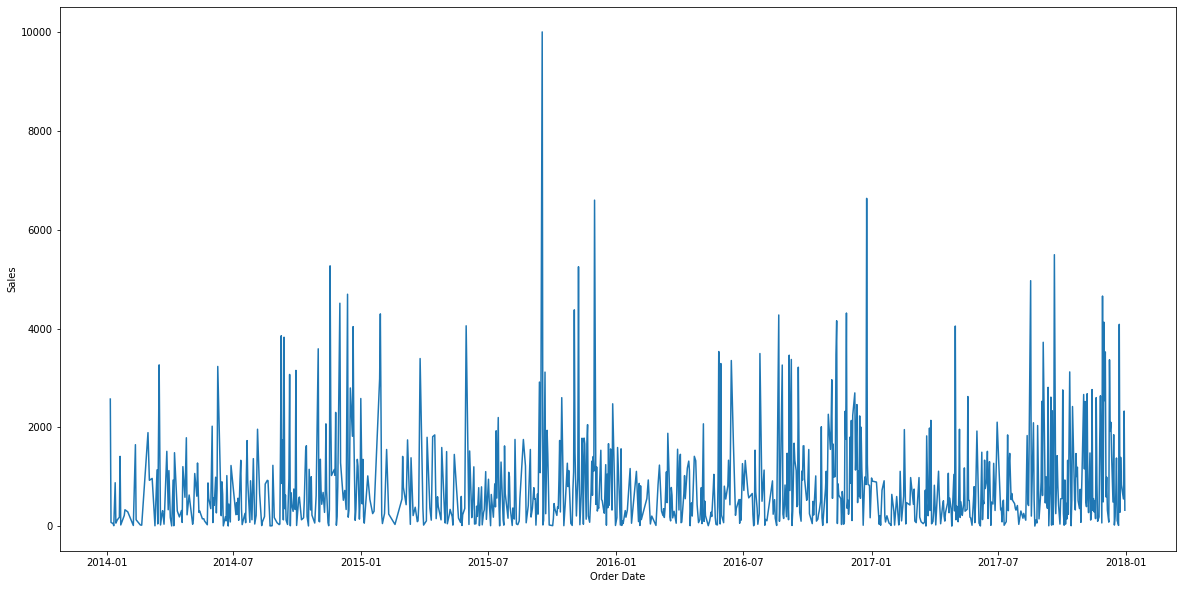

In [34]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data.index, y = data['Sales'])

위와 같이 컬럼이 한가지만 존재할 경우 그리고, x축에 들어갈 값이 (날짜 등과같은) 존재할 경우 아래와 같은 .plot로 더 간단하게 그릴 수 있다. (Seaborn 보다 plt가 편하다.)

<AxesSubplot:xlabel='Order Date'>

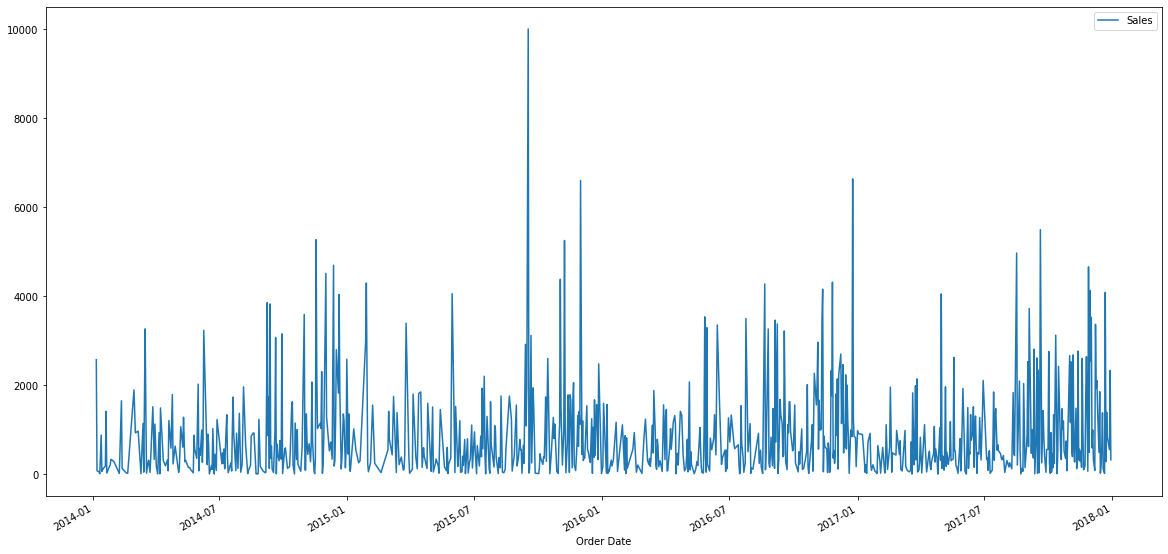

In [38]:
data.plot(figsize = (20,10))

추세를 예측하기 어려운 그림이다. 월 단위로 묶어서 다시 보자. .resample() 함수롤 사용한다.

In [40]:
data.resample('MS').mean()  # MS는 월별, 그리고 평균값 mean() 

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [42]:
data = data.resample('MS').mean() # 최종적으로 사용할 data 완성 (할당해주자)

<AxesSubplot:xlabel='Order Date'>

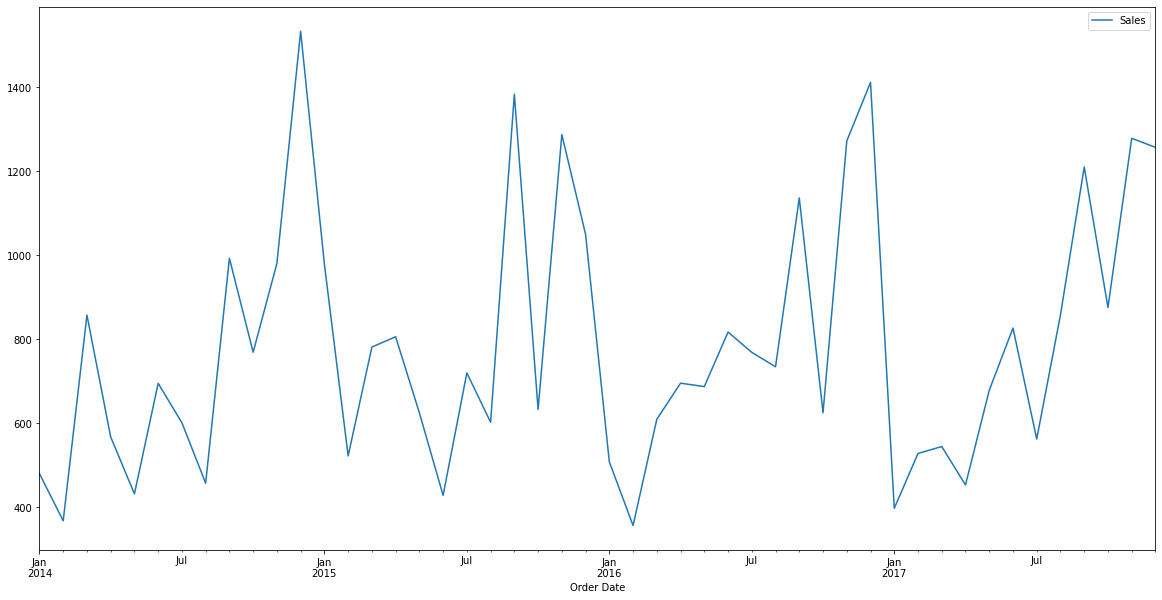

In [43]:
data.plot(figsize = (20,10))

In [44]:
from fbprophet import Prophet

In [45]:
data

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


 fbprophet을 사용하기 위해서는 몇몇 조건이 필요함으로 변경해야 한다. 이것을 알아보자.  컬럼이 ds 와 y 로 나타내야함.

In [51]:
df = data.reset_index()

In [52]:
df

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [53]:
df.columns = ['ds','y']

In [54]:
 df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [55]:
model = Prophet()

In [57]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


예측하고자하는 모델 범위 지정  .make_future_dataframe() 함수 사용

In [63]:
future = model.make_future_dataframe(periods = 12, freq = 'MS')   # 12개월 / 월 단위 리셋을 나타내는 파라미터 (periods = 12, freq = 'MS')

In [64]:
future

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
5,2014-06-01
6,2014-07-01
7,2014-08-01
8,2014-09-01
9,2014-10-01


In [65]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,726.057713,375.555739,695.295314,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,535.372051
1,2014-02-01,727.494023,293.399920,613.931087,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,451.116320
2,2014-03-01,728.791335,551.787401,875.526653,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,706.401580
3,2014-04-01,730.227645,479.070561,779.563943,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,630.086487
4,2014-05-01,731.617622,407.290288,727.947444,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,570.801960
5,2014-06-01,733.053932,464.110554,775.510263,733.053932,733.053932,-113.832366,-113.832366,-113.832366,-113.832366,-113.832366,-113.832366,0.0,0.0,0.0,619.221566
6,2014-07-01,734.443909,489.017230,815.461714,734.443909,734.443909,-81.335686,-81.335686,-81.335686,-81.335686,-81.335686,-81.335686,0.0,0.0,0.0,653.108224
7,2014-08-01,735.880219,451.040361,773.906672,735.880219,735.880219,-117.154950,-117.154950,-117.154950,-117.154950,-117.154950,-117.154950,0.0,0.0,0.0,618.725269
8,2014-09-01,737.316529,1041.500636,1351.531705,737.316529,737.316529,461.565905,461.565905,461.565905,461.565905,461.565905,461.565905,0.0,0.0,0.0,1198.882434
9,2014-10-01,738.706506,552.932184,858.826910,738.706506,738.706506,-28.820414,-28.820414,-28.820414,-28.820414,-28.820414,-28.820414,0.0,0.0,0.0,709.886092


In [69]:
pred = model.predict(future)

In [70]:
pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [71]:
pred

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,535.372051,378.524766,688.636959
1,2014-02-01,451.116320,293.796833,610.251748
2,2014-03-01,706.401580,543.923578,859.173669
3,2014-04-01,630.086487,466.414631,788.518361
4,2014-05-01,570.801960,418.062888,723.688846
5,2014-06-01,619.221566,473.588452,782.257305
6,2014-07-01,653.108224,489.390112,817.836053
7,2014-08-01,618.725269,465.640830,777.228368
8,2014-09-01,1198.882434,1032.947053,1357.184833
9,2014-10-01,709.886092,557.926691,863.095101


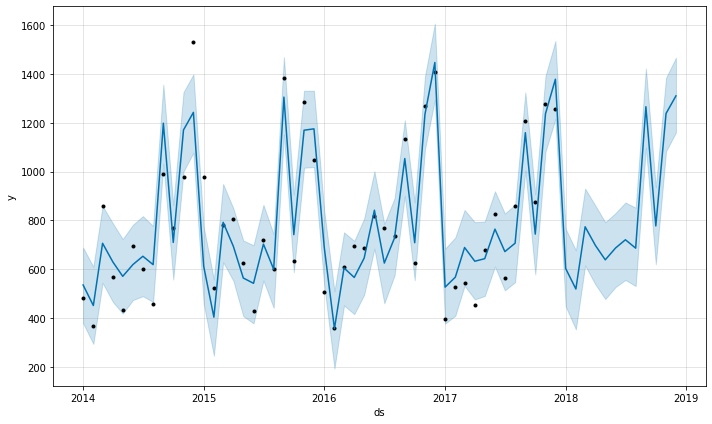

In [73]:
model.plot(pred)
plt.show()

Train ,Test data 셋을 나누어보자. 

In [74]:
data.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187


In [77]:
data[:'2016']   # 2016년 까지의 data만 불러오기

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


2016까지의 데이터를 훈련데이터로 쓰고, 2017년 데이터는 쌩으로 데이터로 사용하고자 한다.

In [78]:
new_df = data[:'2016']

In [79]:
new_df = new_df.reset_index()

In [80]:
new_df.columns = ['ds', 'y']

In [81]:
new_df

,ds,y
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049187
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [122]:
model = Prophet()

In [123]:
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
future = model.make_future_dataframe(periods = 12, freq = 'MS') # 예상할 범위 지정

In [125]:
pred = model.predict(future)

In [126]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,681.588219,489.820917,780.550959,681.588219,681.588219,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,-47.448838,0.0,0.0,0.0,634.139381
1,2014-02-01,685.636335,263.817165,551.384047,685.636335,685.636335,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,0.0,0.0,0.0,411.560088
2,2014-03-01,689.292697,590.943677,877.179408,689.292697,689.292697,42.432009,42.432009,42.432009,42.432009,42.432009,42.432009,0.0,0.0,0.0,731.724706
3,2014-04-01,693.340812,506.537667,808.965787,693.340812,693.340812,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,0.0,0.0,0.0,658.775745
4,2014-05-01,697.258343,380.459041,691.741707,697.258343,697.258343,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,0.0,0.0,0.0,531.946837
5,2014-06-01,701.306459,420.211069,723.366012,701.306459,701.306459,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,0.0,0.0,0.0,567.919984
6,2014-07-01,705.223990,497.611700,804.471583,705.223990,705.223990,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,0.0,0.0,0.0,647.181067
7,2014-08-01,709.272106,383.683725,693.950098,709.272106,709.272106,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,0.0,0.0,0.0,537.645640
8,2014-09-01,713.320221,1001.869125,1292.353941,713.320221,713.320221,436.759246,436.759246,436.759246,436.759246,436.759246,436.759246,0.0,0.0,0.0,1150.079467
9,2014-10-01,717.237752,500.833488,795.834748,717.237752,717.237752,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,0.0,0.0,0.0,640.896934


In [130]:
pred = pred[['ds', 'yhat']]

In [131]:
pred.set_index('ds', inplace=True)

In [132]:
pred = pred['2017':]

In [121]:
pred

,yhat
ds,
2017-01-01,804.654438
2017-02-01,601.206518
2017-03-01,782.905069
2017-04-01,754.585298
2017-05-01,685.352803
2017-06-01,805.507655
2017-07-01,792.293715
2017-08-01,714.448421
2017-09-01,1208.615981


In [99]:
data

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


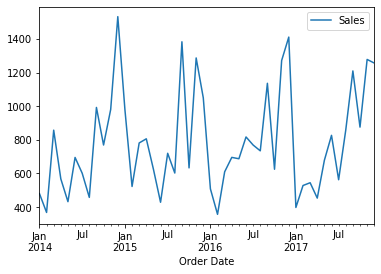

In [100]:
ax = data.plot()

<AxesSubplot:xlabel='ds'>

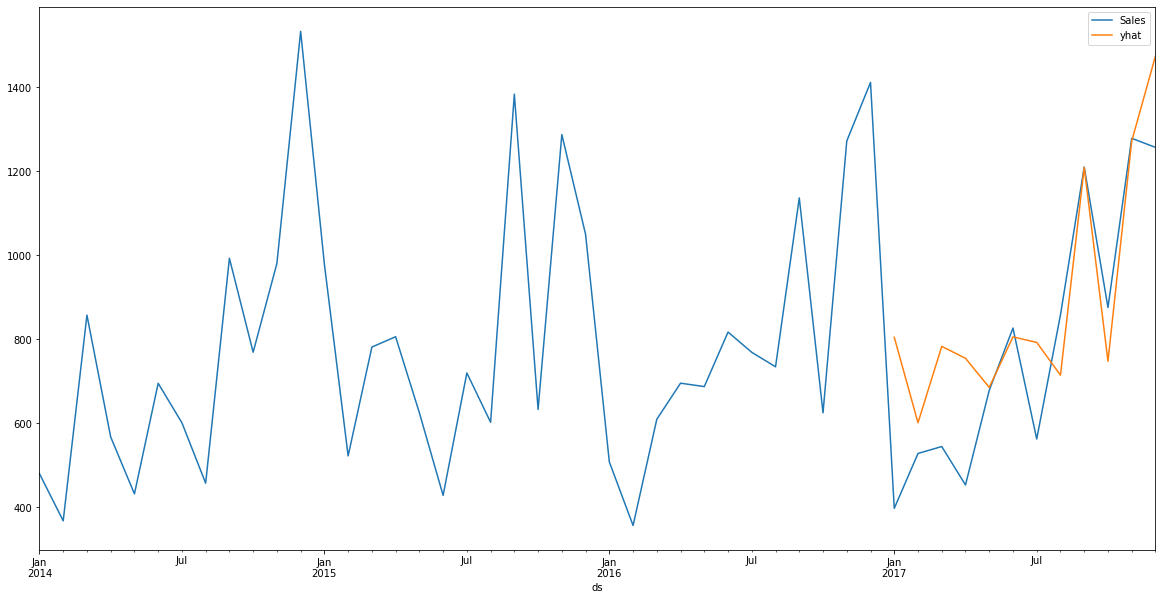

In [102]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20,10))    # ax plot에 pred plot를 겹처서 그리게 하는 파라미터를 추가한다. 

파란색은 실제 Sales의 값이며, 주황색은 우리가 예측한 값이다. 2017년 초반에는 차이가 좀 있지만, 전체 적인 트렌드는 비슷한것을 확인 할 수 있다.

## 3. AutoRegressive 알고리즘을 통한 예측  (성능은 prphet보다 떨어진다.)

In [159]:
data = pd.read_excel('./data/Superstore.xls', index_col=0)

In [160]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

.unique() 함수를 사용하여 Category의 종류를 확인해 볼 수 있다.

In [161]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

.value_counts() 함수를 사용하여  Category의 종류와 수량을 확인 할 수 있다.

In [162]:
data['Category'] == 'Furniture'  ## 불리안 True or False 확인

Row ID
1        True
2        True
3       False
4        True
5       False
        ...  
9990     True
9991     True
9992    False
9993    False
9994    False
Name: Category, Length: 9994, dtype: bool

In [163]:
data.head() # 위 코드와 대조해서 확인 해본다. 

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [164]:
data[data['Category'] == 'Furniture' ] # data['Category'] == 'Furniture' 을 data[]에 넣어 주면 True만 불러와주는 기능을 한다.

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548


In [165]:
data = data[data['Category'] == 'Furniture']  # data에 할당

In [166]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [167]:
data = data[['Order Date', 'Sales']]

In [168]:
data

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840
...,...,...
9963,2015-03-19,383.4656
9965,2016-12-05,13.4000
9981,2015-09-06,85.9800


In [169]:
data.sort_values('Order Date')  #Order Date 칼럼 기준으로 오름차순으로 불러오는 함수를 사용

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940
...,...,...
7637,2017-12-29,258.750
7633,2017-12-29,1207.840
5132,2017-12-29,101.120


우리가 알고자하는 것은 시간에 따른 Sales의 트렌드 임으로 다시 정리를 해준다.

In [185]:
data = data.groupby('Order Date').sum()  # 각 날짜별로 총합을 구한다.

In [186]:
data

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [187]:
data.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

plot을 그려보자.

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

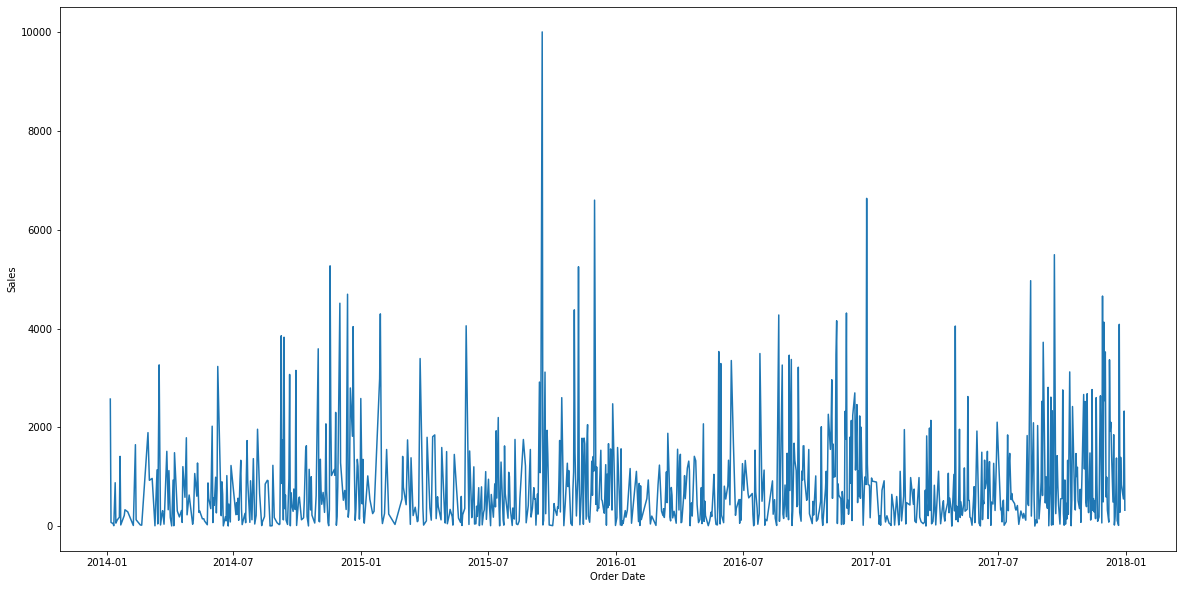

In [188]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data.index, y = data['Sales'])

위와 같이 컬럼이 한가지만 존재할 경우 그리고, x축에 들어갈 값이 (날짜 등과같은) 존재할 경우 아래와 같은 .plot로 더 간단하게 그릴 수 있다. (Seaborn 보다 plt가 편하다.)

<AxesSubplot:xlabel='Order Date'>

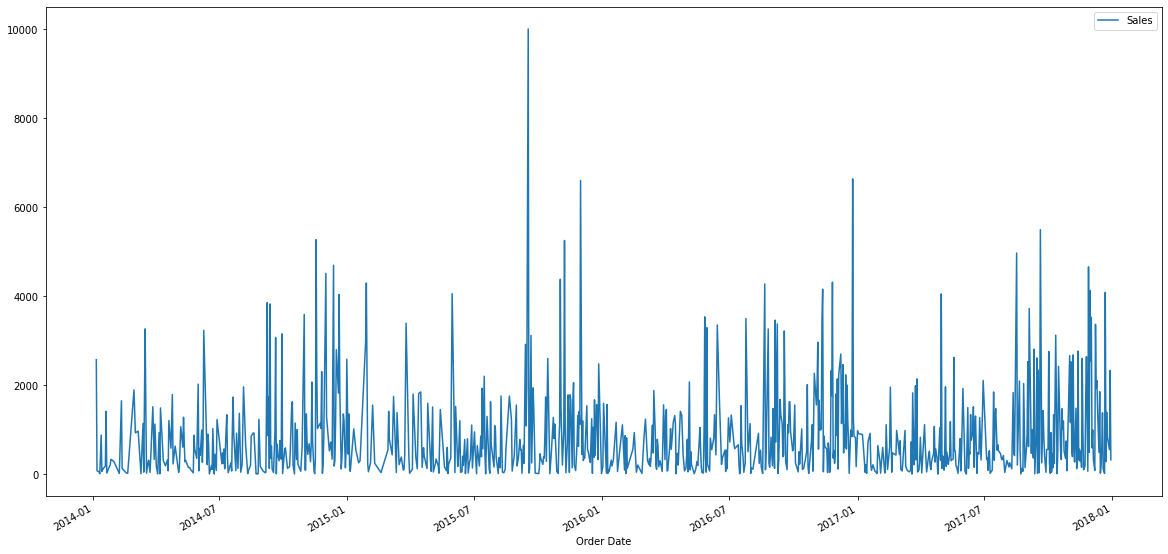

In [189]:
data.plot(figsize = (20,10))

추세를 예측하기 어려운 그림이다. 월 단위로 묶어서 다시 보자. .resample() 함수롤 사용한다.

In [193]:
data = data.resample('MS').mean()  # MS는 월별, 그리고 평균값 mean() 

In [194]:
data  # 답을 비교하기위한 data

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


In [195]:
new_df = data[:'2016']  # train data로 사용할 것이다.

In [196]:
from statsmodels.tsa.ar_model import AutoReg

In [197]:
model = AutoReg(new_df, lags = 12)

/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [198]:
model_fit = model.fit()

In [199]:
len(new_df)

36

In [202]:
pred = model_fit.predict(start = len(new_df) , end = len(new_df)+11 )

In [203]:
pred

2017-01-01     660.758250
2017-02-01     310.973369
2017-03-01     433.467903
2017-04-01     589.733771
2017-05-01     634.609408
2017-06-01     932.697417
2017-07-01     959.741129
2017-08-01     983.674137
2017-09-01     989.383080
2017-10-01     554.888314
2017-11-01    1030.961310
2017-12-01    1194.389892
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Order Date'>

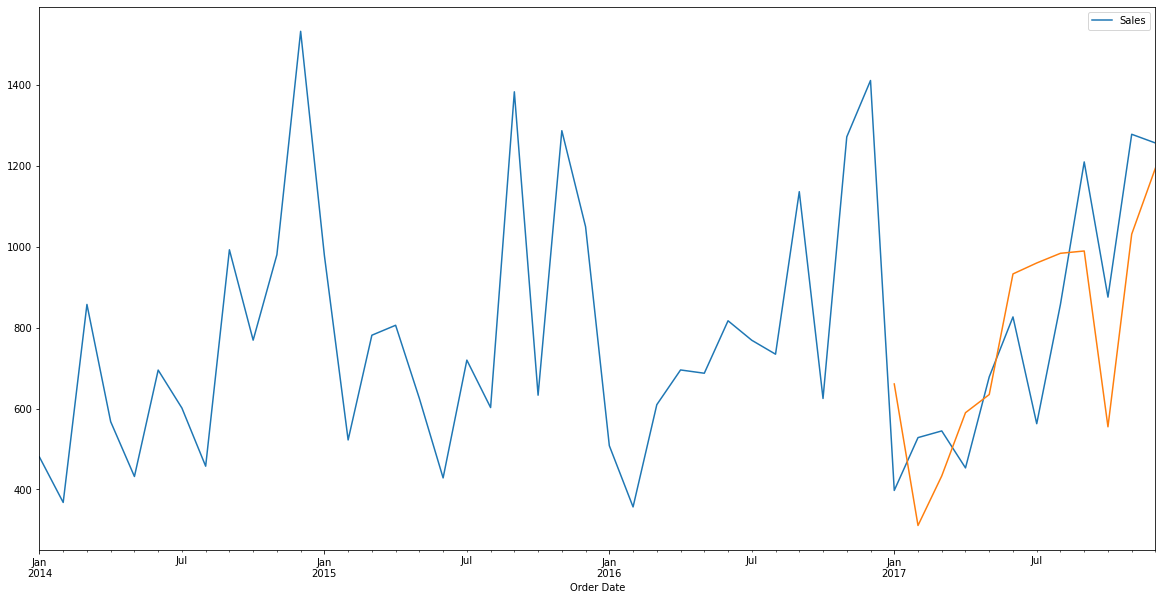

In [204]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20,10))

어느 정도 트렌드는 따라가지만, prophet보다 떨어진 성능을 확인할 수 있다.

-  prophet 를 사용하는 것이 더 좋다.

- 출처 : 파이썬을 활용한 이커머스 데이터 분석